# Details of zomato.csv -

Restaurant Id : Unique id of every restaurant across various cities of the world
Restaurant Name : Name of the restaurant
Country Code : Country in which restaurant is located
City : City in which restaurant is located
Address : Address of the restaurant
Locality : Location in the city
Locality Verbose : Detailed description of the locality
Longitude : Longitude coordinate of the restaurant's location
Latitude : Latitude coordinate of the restaurant's location
Cuisines : Cuisines offered by the restaurant
Average Cost for two : Cost for two people in different currencies
Currency : Currency of the country
Has Table booking : yes/no
Has Online delivery : yes/ no
Is delivering : yes/ no
Switch to order menu : yes/no
Price range : range of price of food
Aggregate Rating : Average rating out of 5
Rating color : depending upon the average rating color
Rating text : text on the basis of rating of rating
Votes : Number of ratings casted by people

# Problem Statement 1

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

    1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India

    1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

    1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import matplotlib.pyplot as plt, seaborn as sns

Summarising all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [58]:
df = pd.read_csv('zomato.csv')
code = df['Country Code'].unique()
india_df = df[df['Country Code']==1]
# Merging New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR
NCR = ['New Delhi' ,'Ghaziabad','Noida','Gurgaon','Faridabad']
delhi_ncr = india_df[india_df['City'].isin(NCR)]
rest_india = india_df[~india_df['City'].isin(NCR)]
delhi_ncr_restaurant = delhi_ncr.groupby('City')['Restaurant Name'].count().sum()
rest_india_restaurant  =  rest_india.groupby('City')['Restaurant Name'].count().sum()

In [59]:
rest_india_restaurant,delhi_ncr_restaurant

(705, 7947)

    1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

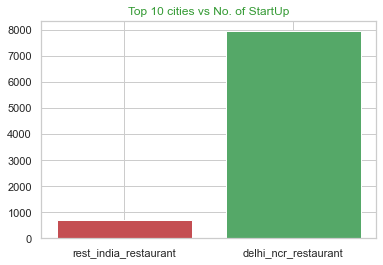

In [449]:
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
sns.set(style="whitegrid")
plt.bar(['rest_india_restaurant','delhi_ncr_restaurant'],[rest_india_restaurant,delhi_ncr_restaurant],color=['r','g'])
# plt.xticks(rotation=45, ha='right')
plt.title('Top 10 cities vs No. of StartUp',color='green',alpha=0.8)
plt.show()

 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [68]:
h = {"User-agent": "curl/7.43.0", "Accept": "application/json", 
     "user_key":"627c28c07ad221c65491bbffea6f5d54"}
params = {'city_id':1}
all_cuisine_name = []
r = requests.get('https://api.zomato.com/v2.1/cuisines',headers = h,params = params)
for i in r.json()['cuisines']:
    all_cuisine_name.append(i['cuisine']['cuisine_name'])


In [117]:
# cuisine thst are not present in Delhi Ncr but present in rest of india
delhi_ncr_cusine = []
for i in delhi_ncr['Cuisines'] :
    [delhi_ncr_cusine.append(j.strip()) for j in i.split(',')]

rest_india_cusine= []
for i in rest_india['Cuisines'] :
    [rest_india_cusine.append(j.strip()) for j in i.split(',')]
    
for i in all_cuisine_name:
    if i in rest_india_cusine and i not in delhi_ncr_cusine:
        print("This cuisine available in rest of india - "+ i+ " - but not in Delho-NCR")


This cuisine available in rest of india - BBQ - but not in Delho-NCR
This cuisine available in rest of india - Cajun - but not in Delho-NCR
This cuisine available in rest of india - German - but not in Delho-NCR
This cuisine available in rest of india - Malwani - but not in Delho-NCR


   1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

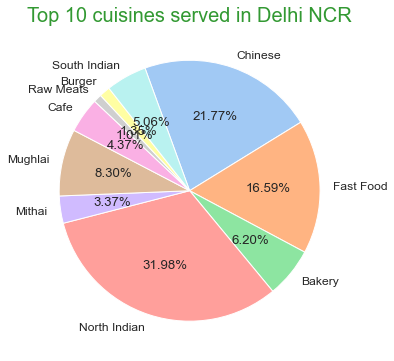

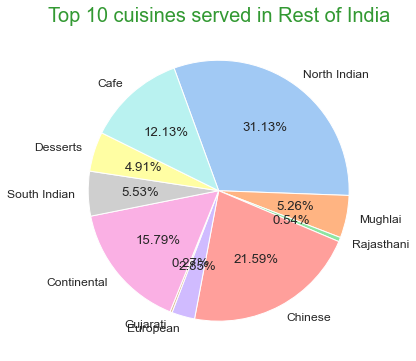

In [507]:
k = {}
for i in delhi_ncr_cusine :
    if i in k:
        k[i] = k[i]+1
    else:
        k[i]=1
        
cus = list(k.keys())[0:10]
cus_count = list(k.values())[0:10]

sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
# sns.set(style="whitegrid")
plt.figure(figsize=(10,6))    
# color = ['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B']
# plt.bar(cus,cus_count,color = color)
plt.pie(cus_count,labels=cus,autopct='%0.2f%%',counterclock=False,startangle=110)
# plt.xticks(rotation=45, ha='right')
plt.title('Top 10 cuisines served in Delhi NCR',color='green',alpha=0.8,fontsize = 20)
plt.show()


k = {}
for i in rest_india_cusine :
    if i in k:
        k[i] = k[i]+1
    else:
        k[i]=1
        
cus = list(k.keys())[0:10]
cus_count = list(k.values())[0:10]

sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1)
# sns.set(style="whitegrid")
plt.figure(figsize=(10,6))    
# color = ['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B']
# plt.bar(cus,cus_count,color = color)
plt.pie(cus_count,labels=cus,autopct='%0.2f%%',counterclock=False,startangle=110)
# plt.xticks(rotation=45, ha='right')
plt.title('Top 10 cuisines served in Rest of India',color='green',alpha=0.8,fontsize=20)
plt.show()

# Problem Statement - 2

# 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

    1. how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.


        1.1 Number of Votes given Restaurant

       1.2 Restaurant serving more number of cuisines.

  2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

    2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .


1.1 Number of Votes given Restaurant

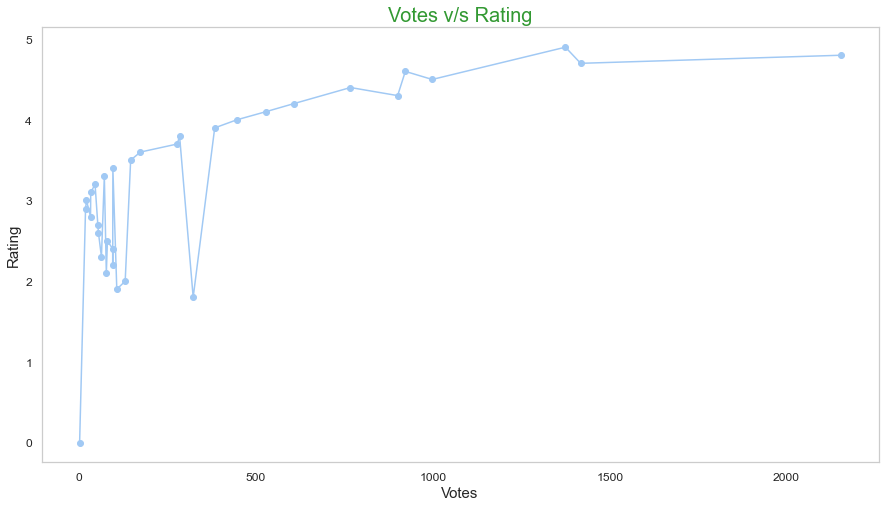

In [537]:
df = pd.read_csv('zomato.csv')
df = df[df['Country Code']==1]
df.dropna(subset=['Votes','Aggregate rating'],inplace=True)
data = df["Votes"].groupby(df['Aggregate rating']).mean()
c = data.sort_values(ascending=True)
rating = c.index
votes = c.values
plt.figure(figsize=(15,8))
plt.scatter(votes,rating)
plt.plot(votes,rating)
plt.title('Votes v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Votes',size=15)
plt.ylabel('Rating',size=15)
plt.grid()
plt.show()

Restaurant serving more number of cuisines.

In [535]:
#Restaurant serving more number of cuisines.
df = pd.read_csv('zomato.csv')
df = df[df['Country Code']==1]
df.dropna(subset=['Restaurant Name','Cuisines'],inplace=True)
def fun_len(x):
    if type(x)==list:
        return len(x)
    return 0
df['len_Cuisines'] = df['Cuisines'].str.split(',').apply(fun_len)
df = df.sort_values(by ='len_Cuisines', ascending=False)
# idx = df['len_Cuisines'].idxmax()
# print("Restaurant Name - " + df['Restaurant Name'][idx] +  " Cuisines- "+ df['Cuisines'][idx])
df[['Restaurant Name', 'Cuisines','len_Cuisines']].head(10)

,Restaurant Name,Cuisines,len_Cuisines
5451,Healthy Food Station,"Salad, Healthy Food, Burger, Italian, Continen...",8
2487,Mumbai Vibe,"Cafe, Continental, North Indian, Italian, Chin...",8
2801,Bikanervala,"North Indian, South Indian, Fast Food, Street ...",8
2497,R' ADDA,"Street Food, Burger, Desserts, Italian, Pizza,...",8
3737,Bikanervala,"North Indian, South Indian, Fast Food, Street ...",8
2098,Bikanervala,"North Indian, South Indian, Fast Food, Street ...",8
7985,Bikanervala,"North Indian, South Indian, Fast Food, Street ...",8
6664,Bikanervala,"North Indian, South Indian, Fast Food, Street ...",8
4875,Bikanervala,"North Indian, South Indian, Fast Food, Street ...",8
9119,Indian Summer Cafe,"Continental, Cafe, Italian, Pizza, North India...",8


 
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
    

  2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)

Hotel Clarks Amer, Malviya Nagar  -  4.9
Aminabad  -  4.9
Friends Colony  -  4.886916367367881
Powai  -  4.841868613138686
Kirlampudi Layout  -  4.820161290322581
Deccan Gymkhana  -  4.8
Express Avenue Mall,  Royapettah  -  4.8
Banjara Hills  -  4.7187617260787995
Sector 5, Salt Lake  -  4.707022552098202
Riverside Mall, Gomti Nagar  -  4.7


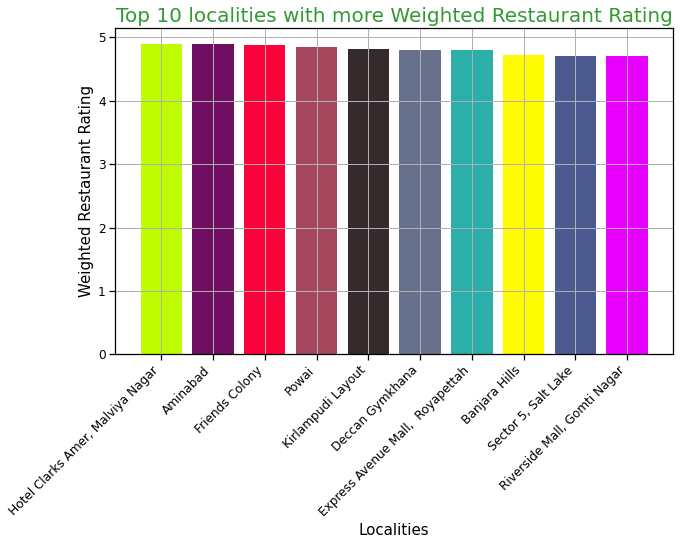

In [423]:
df = pd.read_csv('zomato.csv')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes','Locality'],inplace=True)
x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))
weighted_rating = x/y
weighted_rating = weighted_rating.sort_values(ascending=False)[0:10]

for i in weighted_rating.keys():
    print(i, " - " ,weighted_rating[i])

color = ['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B','#2CAFAB','#FEFA00','#4C5A91','#E700FE']
plt.figure(figsize=(10,6))    
plt.bar(weighted_rating.keys(),weighted_rating.values , color=color)
plt.ylabel('Weighted Restaurant Rating',size=15)
plt.xlabel('Localities',size=15)
plt.title('Top 10 localities with more Weighted Restaurant Rating',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# Problem Statement-3

 3. Visualization

    3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

    3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

    3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

    3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

    3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

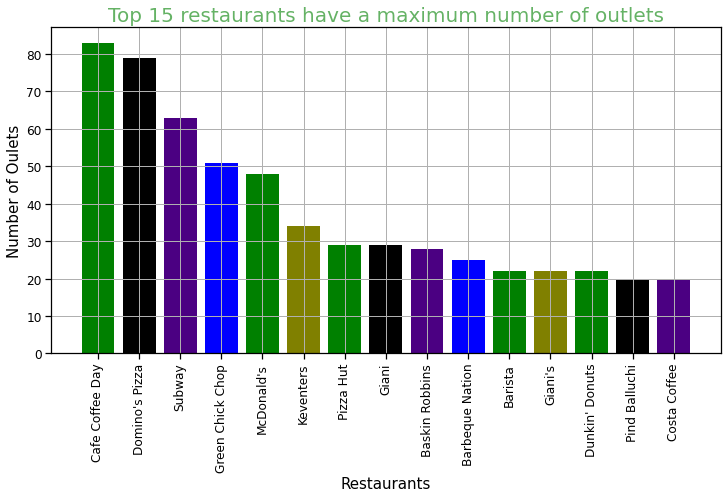

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('zomato.csv')
df = df[df['Country Code']==1]
outlet = df['Restaurant Name'].value_counts().head(15)
outlet_name = list(outlet.index)
outlet_count = list(outlet.values)

color = ['green','black','indigo','blue','green','olive']
plt.figure(figsize=(12,6))
plt.bar(outlet_name,outlet_count,color=color)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Number of Oulets',size=15)
plt.xticks(rotation=90)
plt.title("Top 15 restaurants have a maximum number of outlets", fontsize=20, color='green',alpha=0.6)
plt.grid()
plt.show()


3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)

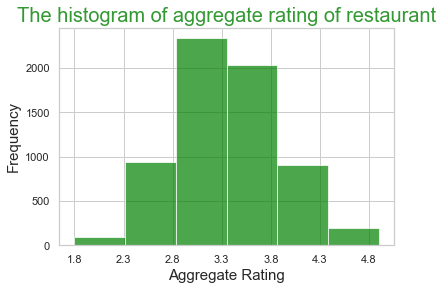

In [453]:
df1 = df.copy()
df1.dropna(subset=['Aggregate rating'],inplace=True)
df1 = df1[df1['Aggregate rating']!=0]
rating = df1['Aggregate rating']
rating = list(rating)
xt = np.arange(1.8, 5, 0.5)
plt.hist(rating,bins=6,edgecolor='white',color='green',alpha=0.7)
plt.title('The histogram of aggregate rating of restaurant',fontsize=20, color='green',alpha=0.8)
plt.ylabel('Frequency',size=15)
plt.xlabel('Aggregate Rating',size=15)
plt.xticks(xt)
plt.show()

3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

1 Toit 10934
2 Truffles 9667
3 Hauz Khas Social 7931
4 Peter Cat 7574
5 AB's - Absolute Barbecues 6907
6 Barbeque Nation 5966
7 Big Brewsky 5705
8 AB's - Absolute Barbecues 5434
9 The Black Pearl 5385
10 BarBQ 5288


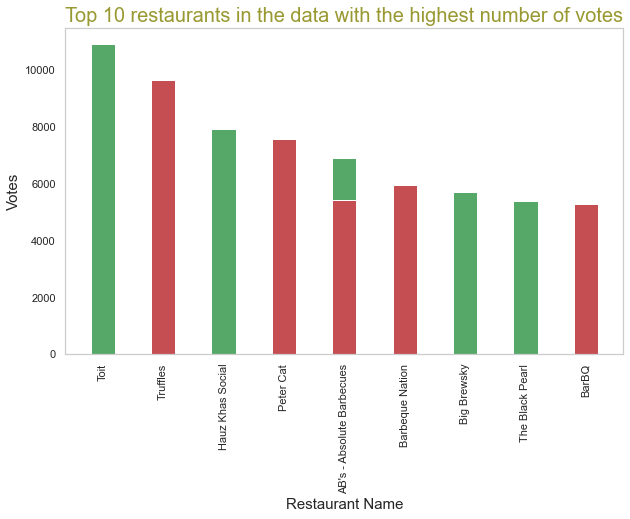

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('zomato.csv')
df = df.sort_values(by ='Votes', ascending=False).head(10)
res_name = list(df['Restaurant Name'])
votes = list(df['Votes'])

for i in range(10):
    print(i+1,res_name[i],votes[i])

plt.figure(figsize=(10,6))
plt.bar(res_name,votes,width=0.4,color = ['g','r'])
plt.ylabel("Votes",size=15)
plt.xlabel("Restaurant Name",size=15)
plt.title('Top 10 restaurants in the data with the highest number of votes',fontsize=20, color='olive',alpha=0.8)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

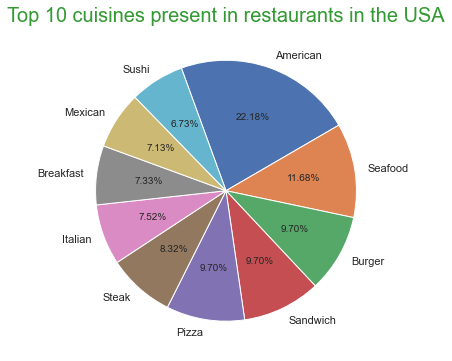

In [499]:
df = pd.read_csv('zomato.csv')
df = df[df['Country Code']==216]
df.dropna(subset=['Cuisines'],inplace=True)
cuisines = df['Cuisines'].str.split(',')
k = {}
for i in cuisines:
    for j in i:
        j = j.strip()
        k[j] = k.get(j,0)+1
        
cus_key = dict(sorted(k.items(), key=lambda item: item[1],reverse = True))
x = list(cus_key.keys())[0:10]
y = list(cus_key.values())[0:10]
plt.figure(figsize=(12,6))
plt.pie(y,labels=x,autopct='%0.2f%%',counterclock=False,startangle=110)
plt.title('Top 10 cuisines present in restaurants in the USA',fontsize=20, color='green',alpha=0.8)
plt.show()

3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

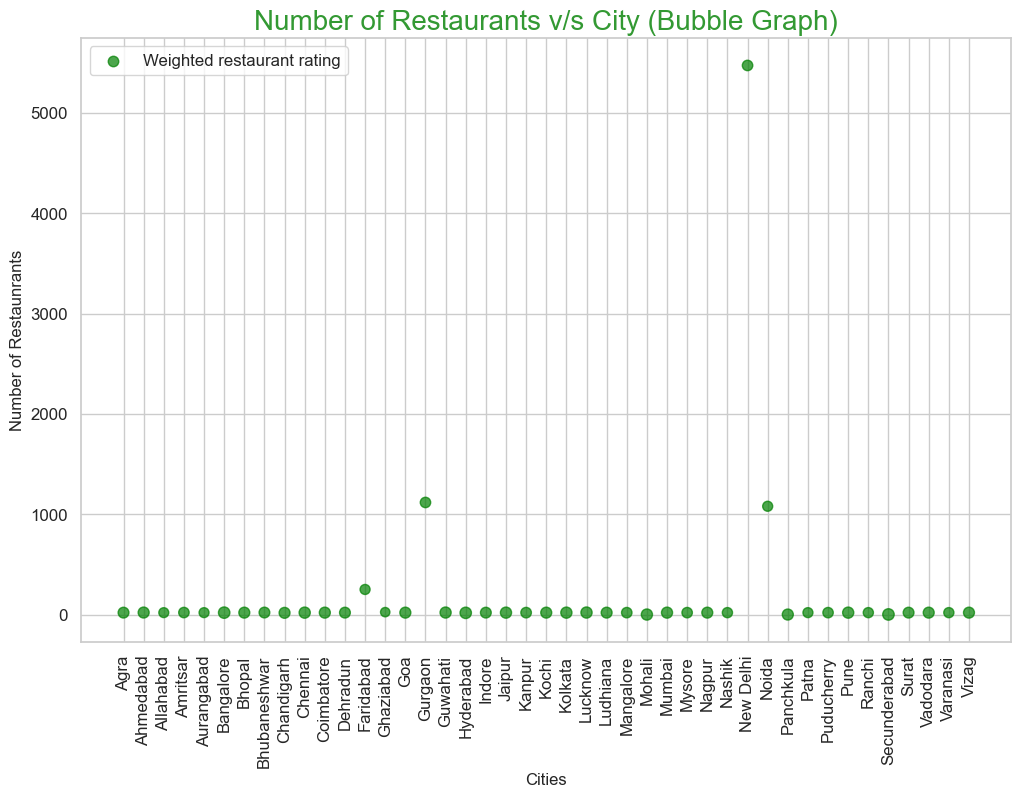

In [541]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes','City'],inplace=True)

# grouping dataframe by City and calculating Weighted rating.
x = df.groupby(by = 'City').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'City').apply(lambda x: (x['Votes'].sum()))
restaurant_count = df.groupby(by = 'City').count()['Restaurant Name']
weighted_rating = x/y

# plotting bubble graph and keeping weighted rating as size of the bubble.
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='green')
plt.scatter( restaurant_count.index,restaurant_count.values,s = weighted_rating*15, alpha = 0.7, c = 'green')
plt.title('Number of Restaurants v/s City (Bubble Graph)',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Cities', size = 12)
plt.ylabel('Number of Restaunrants', size = 12)
plt.legend(['Weighted restaurant rating'],loc ='upper left')
plt.xticks(rotation = 90)
plt.show()